<a href="https://colab.research.google.com/github/Anandharajan/DriverBehaviour/blob/master/DriverBehaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os



In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/Anandharajan/DriverBehaviour/master/driver.csv",sep = ",")

In [3]:
print("There are",len(df.columns),"columns:")
for x in df.columns:
    sys.stdout.write(str(x)+", ")

There are 9 columns:
bac, brakpre, steerangle, vehispeed, engispeed, longacc, transvacc, yawrat, accident, 

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
bac           50 non-null float64
brakpre       50 non-null int64
steerangle    50 non-null int64
vehispeed     50 non-null int64
engispeed     50 non-null int64
longacc       50 non-null int64
transvacc     50 non-null int64
yawrat        50 non-null float64
accident      50 non-null int64
dtypes: float64(2), int64(7)
memory usage: 3.6 KB
None


In [5]:
print(df.head())

    bac  brakpre  steerangle  vehispeed  engispeed  longacc  transvacc  \
0  0.02       90          60         40       2000       15         15   
1  0.02       88          80         50       2200       20        -15   
2  0.05       88          90         68       2600       10         48   
3  0.05      100         -90         30       1800      -28         80   
4  0.05      100         -80         50       2200      -30         40   

   yawrat  accident  
0    0.00         0  
1    0.50         0  
2    0.05         0  
3    1.80         1  
4    0.03         0  


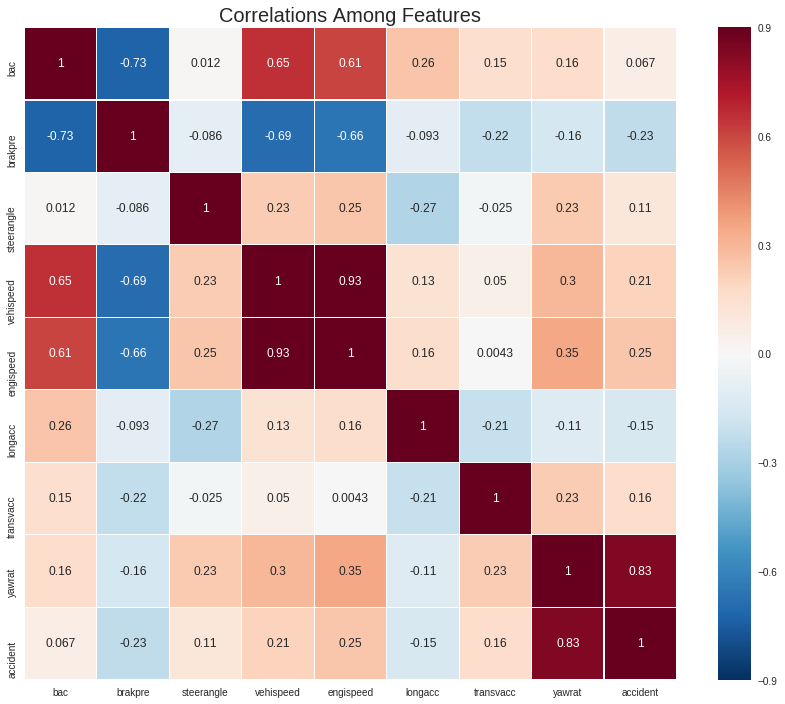

In [6]:
plt.subplots(figsize = (15,12))
sns.heatmap(df.corr(), 
            annot=True,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20);
plt.show()

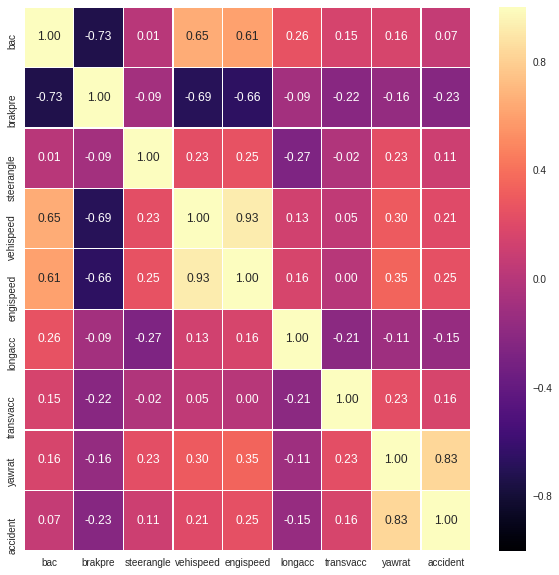

In [7]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

In [9]:
# reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Anandharajan/DriverBehaviour/master/driver.csv",sep = ",")

# it may be needed in the future.
serialNo = df["Serial No."].values

df.drop(["Serial No."],axis=1,inplace = True)

df=df.rename(columns = {'accident':'accident'})

KeyError: ignored

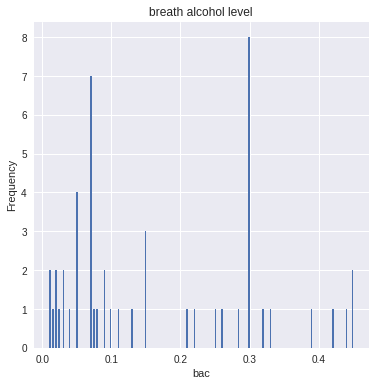

In [8]:
df["bac"].plot(kind = 'hist',bins = 200,figsize = (6,6))
plt.title("breath alcohol level")
plt.xlabel("bac")
plt.ylabel("Frequency")
plt.show()

In [0]:
y = df["accident"].values
x = df.drop(["accident"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


In [11]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

real value of y_test[1]: 0 -> the predict: [0.03349059]
real value of y_test[2]: 0 -> the predict: [-0.07353739]
r_square score:  0.9163788137435925
r_square score (train dataset):  0.7324271333714718


In [13]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42)
rfr.fit(x_train,y_train)
y_head_rfr = rfr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_rfr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[2],:])))


y_head_rf_train = rfr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_rf_train))

r_square score:  0.99275
real value of y_test[1]: 0 -> the predict: [0.]
real value of y_test[2]: 0 -> the predict: [0.]
r_square score (train dataset):  0.9597264957264957


In [14]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)
y_head_dtr = dtr.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[2],:])))

y_head_dtr_train = dtr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_dtr_train))

r_square score:  1.0
real value of y_test[1]: 0 -> the predict: [0.]
real value of y_test[2]: 0 -> the predict: [0.]
r_square score (train dataset):  1.0


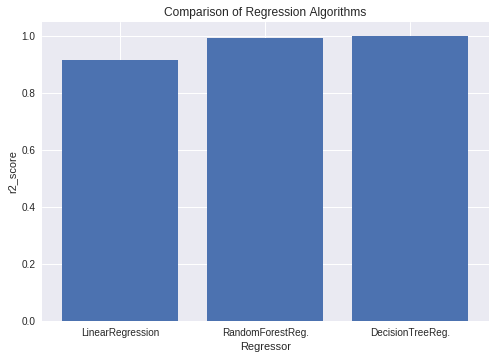

In [15]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_rfr),r2_score(y_test,y_head_dtr)])
x = ["LinearRegression","RandomForestReg.","DecisionTreeReg."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()


In [19]:
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(lr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[5],:])))
print("real value of y_test[5]: " + str(y_test[5]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[5],:])))

print()

print("real value of y_test[10]: " + str(y_test[10]) + " -> the predict: " + str(lr.predict(x_test.iloc[[10],:])))
print("real value of y_test[10]: " + str(y_test[10]) + " -> the predict: " + str(rfr.predict(x_test.iloc[[10],:])))
print("real value of y_test[10]: " + str(y_test[10]) + " -> the predict: " + str(dtr.predict(x_test.iloc[[10],:])))

real value of y_test[5]: 1 -> the predict: [0.84341382]
real value of y_test[5]: 1 -> the predict: [0.9]
real value of y_test[5]: 1 -> the predict: [1.]



IndexError: ignored

In [26]:
# reading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/Anandharajan/DriverBehaviour/master/driver.csv",sep = ",")

df=df.rename(columns = {'accident ':'accident'})
y = df["accident"].values
x = df.drop(["accident"],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

# normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

y_train_01 = [1 if each > 0.8 else 0 for each in y_train]
y_test_01  = [1 if each > 0.8 else 0 for each in y_test]

# list to array
y_train_01 = np.array(y_train_01)
y_test_01 = np.array(y_test_01)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


score:  1.0
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 0 -> the predict: [0]


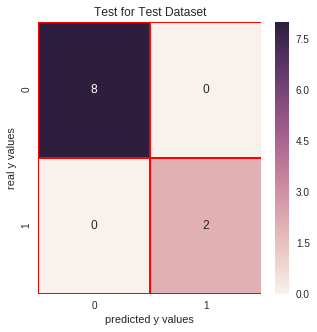

precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


In [27]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(x_train,y_train_01)
print("score: ", lrc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(lrc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(lrc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_lrc = confusion_matrix(y_test_01,lrc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,lrc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,lrc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,lrc.predict(x_test)))

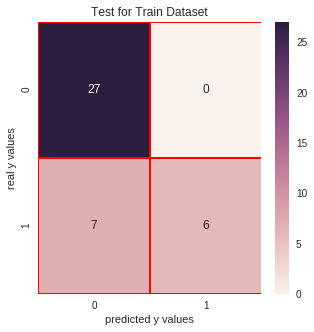

In [28]:
cm_lrc_train = confusion_matrix(y_train_01,lrc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_lrc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

score:  0.8
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 0 -> the predict: [0]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


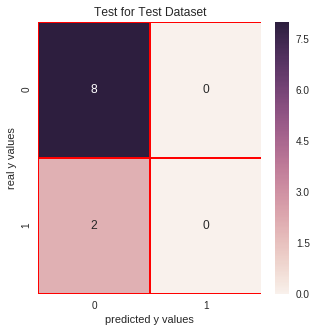

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


precision_score:  0.0
recall_score:  0.0
f1_score:  0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [29]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train,y_train_01)
print("score: ", svm.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(svm.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(svm.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test_01,svm.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,svm.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,svm.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,svm.predict(x_test)))

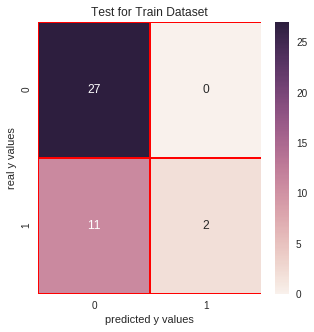

In [30]:
cm_svm_train = confusion_matrix(y_train_01,svm.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_svm_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

score:  1.0
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 0 -> the predict: [0]


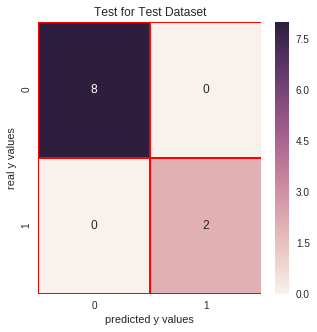

precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


In [31]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train_01)
print("score: ", nb.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(nb.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(nb.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_01,nb.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,nb.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,nb.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,nb.predict(x_test)))

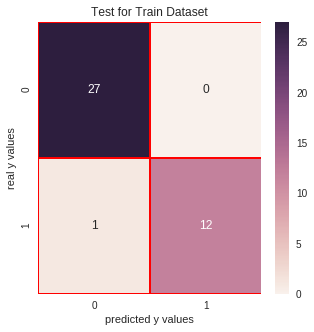

In [32]:
cm_nb_train = confusion_matrix(y_train_01,nb.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_nb_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

score:  1.0
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 0 -> the predict: [0]


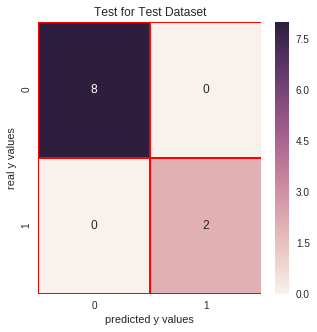

precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


In [33]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train_01)
print("score: ", dtc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(dtc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(dtc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(y_test_01,dtc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,dtc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,dtc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,dtc.predict(x_test)))

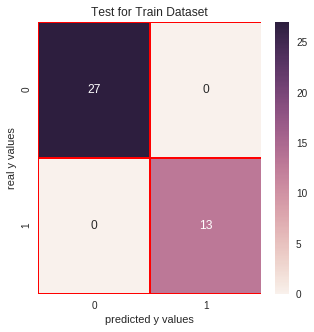

In [34]:
cm_dtc_train = confusion_matrix(y_train_01,dtc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_dtc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

score:  1.0
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 0 -> the predict: [0]


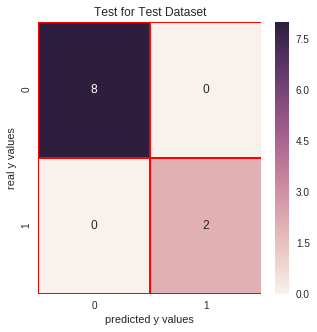

precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,random_state = 1)
rfc.fit(x_train,y_train_01)
print("score: ", rfc.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(rfc.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(rfc.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_rfc = confusion_matrix(y_test_01,rfc.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29
# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,rfc.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,rfc.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,rfc.predict(x_test)))

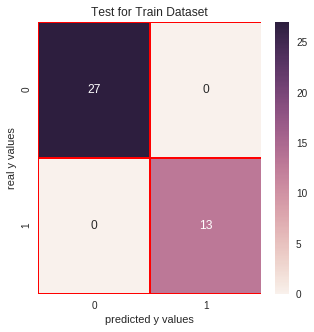

In [36]:
cm_rfc_train = confusion_matrix(y_train_01,rfc.predict(x_train))
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_rfc_train,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.title("Test for Train Dataset")
plt.show()

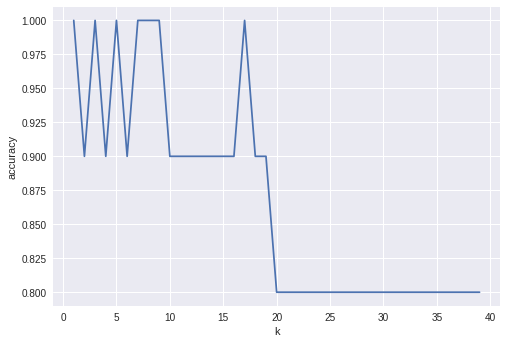

score of 3 : 1.0
real value of y_test_01[1]: 0 -> the predict: [0]
real value of y_test_01[2]: 0 -> the predict: [0]


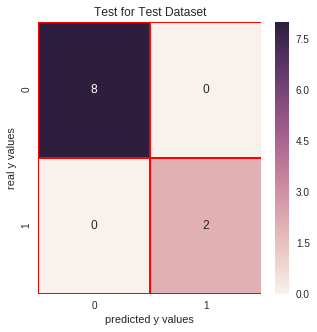

precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


In [38]:
from sklearn.neighbors import KNeighborsClassifier

# finding k value
scores = []
for each in range(1,40):
    knn_n = KNeighborsClassifier(n_neighbors = each)
    knn_n.fit(x_train,y_train_01)
    scores.append(knn_n.score(x_test,y_test_01))
    
plt.plot(range(1,40),scores)
plt.xlabel("k")
plt.ylabel("accuracy")
plt.show()

knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train_01)
print("score of 3 :",knn.score(x_test,y_test_01))
print("real value of y_test_01[1]: " + str(y_test_01[1]) + " -> the predict: " + str(knn.predict(x_test.iloc[[1],:])))
print("real value of y_test_01[2]: " + str(y_test_01[2]) + " -> the predict: " + str(knn.predict(x_test.iloc[[2],:])))

# confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test_01,knn.predict(x_test))
# print("y_test_01 == 1 :" + str(len(y_test_01[y_test_01==1]))) # 29

# cm visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm_knn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.title("Test for Test Dataset")
plt.xlabel("predicted y values")
plt.ylabel("real y values")
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ", precision_score(y_test_01,knn.predict(x_test)))
print("recall_score: ", recall_score(y_test_01,knn.predict(x_test)))

from sklearn.metrics import f1_score
print("f1_score: ",f1_score(y_test_01,knn.predict(x_test)))